In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=a50711982be239958a75ae6edcd3afcb878f21d209b36533b9c7f701197e4d77
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:

# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [ ]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed


In [ ]:
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,...,VFC,VIAC,VLO,VMC,VNO,VNT,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,85.398193,28.982893,158.154831,74.573036,84.852608,83.938957,168.809998,85.600449,206.829712,334.429993,118.519348,44.922726,167.169968,187.830002,74.633308,91.241516,19.507826,52.246086,50.037643,49.053261,130.282578,94.271568,87.639999,71.596565,283.679993,67.785583,110.997246,124.238136,107.839996,61.554165,10.278079,49.099998,100.186646,235.229111,165.769714,225.507385,1898.010010,204.720001,259.589996,297.744690,...,98.148216,41.124256,90.956909,141.499435,62.789101,NaN,150.376770,196.729996,219.449997,53.591969,58.491680,80.508705,235.059998,57.253372,64.771545,88.815918,77.317070,51.909870,144.480637,202.071640,112.600060,22.021412,117.414719,68.562302,42.332024,151.352829,25.408863,29.037527,142.405029,61.184597,100.399811,67.240555,56.502354,35.372929,79.031929,100.691872,148.258896,259.140015,50.968010,133.542831
2020-01-03,84.027046,27.548195,158.164749,73.848030,84.047203,82.883308,166.820007,84.556908,206.485229,331.809998,116.432976,44.835045,166.816620,184.949997,74.662743,91.143898,19.283821,51.883739,49.650959,49.829113,130.902679,94.074158,87.239998,70.571083,280.440002,66.542633,111.007080,122.702377,106.410004,60.574444,10.142713,48.599998,100.325790,233.632172,163.702835,225.615936,1874.969971,200.850006,256.970001,293.796173,...,97.531288,40.498943,87.505264,140.884735,63.277992,NaN,151.839554,200.880005,217.979996,54.238224,57.868923,79.892082,231.009995,57.253372,63.774597,89.374260,78.677414,51.591164,142.018295,202.121109,113.694313,22.115158,116.378189,68.651772,41.581837,151.751816,25.321548,29.086929,140.292755,61.478848,98.088585,66.699974,55.877087,34.913166,79.497108,100.376495,147.871353,256.049988,50.248787,133.562759
2020-01-06,84.275452,27.219410,155.565384,74.436470,84.710480,84.096809,179.039993,84.999916,205.136902,333.709991,115.065033,44.484310,167.042374,187.119995,74.731445,91.446533,19.507826,51.736847,49.689625,50.139454,131.020798,94.508453,87.550003,70.492195,285.880005,66.224434,111.331757,122.474495,106.580002,59.268150,10.075031,48.389999,100.435127,235.425064,164.241592,225.556747,1902.880005,202.860001,254.589996,297.329071,...,97.149391,41.094948,87.514824,140.636887,64.102394,NaN,152.187836,202.740005,224.029999,54.798950,57.744373,79.563881,228.880005,57.747601,62.550629,89.442818,79.873734,51.282120,143.351669,202.368408,114.285797,22.405777,116.141258,68.552345,40.948559,151.831604,25.079004,29.027647,140.015091,61.390568,96.044044,67.212105,56.184761,34.386356,78.982445,100.317375,147.016785,258.010010,49.636467,132.537338
2020-01-07,84.533775,27.119778,153.720047,74.086395,84.227234,83.494980,180.350006,84.527367,200.707962,333.390015,117.682831,43.948479,165.020493,187.500000,75.006218,91.466057,19.576002,51.247192,49.409275,49.489674,130.134933,93.491814,90.199997,71.419083,283.059998,65.806808,110.377426,121.008080,106.849998,60.980186,9.988010,48.250000,101.011589,233.210892,162.262909,220.750519,1906.859985,204.850006,256.670013,296.428528,...,96.669571,41.163342,88.662186,139.050537,63.325916,NaN,153.461548,203.210007,223.789993,54.342773,57.102444,79.534050,231.979996,57.456879,66.785164,89.099983,79.352753,50.857185,143.400314,201.952957,114.364662,22.405777,115.065247,67.299622,40.490650,151.44259

In [ ]:
rs = prices.apply(np.log).diff(1)

In [ ]:
#rs.dropna(how = 'any', inplace = True)
#rs.sort_values(by='Date')

dftest = rs.iloc[:, 30:100]

In [ ]:
dftest.dropna(inplace=True)
dftest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-20,-0.017651,-0.005288,-0.085261,-0.054327,-0.060474,-0.067337,-0.018696,-0.078320,-0.036761,-0.047300,-0.010179,-0.058676,-0.024541,-0.009943,0.018444,0.107158,-0.068100,-0.133488,-0.039184,-0.107584,0.005321,-0.126555,-0.133929,-0.039029,-0.127676,-0.028022,-0.074907,-0.031447,-0.058287,-0.003809,-0.139505,-0.032643,-0.052660,-0.031491,-0.011862,-0.013903,-0.113514,-0.090845,-0.008026,-0.028991,-0.037115,-0.024574,-0.042616,-0.040675,-0.009931,-0.010560,0.060625,-0.075700,0.030289,-0.039612,-0.140802,-0.020788,0.182322,-0.011552,-0.103889,0.014002,-0.050683,-0.032282,0.008598,-0.014345,-0.002344,-0.055875,-0.030701,-0.087977,-0.071031,-0.077942,-0.000691,-0.074194,0.020343,0.054180
2020-03-23,-0.097779,0.049980,-0.084933,-0.012401,-0.080525,-0.087109,0.030272,-0.015934,-0.022589,-0.092402,-0.027592,0.024166,-0.113909,-0.067917,-0.014960,0.029019,-0.070465,-0.068413,0.081505,-0.083467,0.006482,-0.142381,-0.036614,-0.072159,-0.006766,0.105866,-0.084288,-0.053415,-0.018762,-0.092960,-0.099461,-0.034970,-0.008148,-0.055884,-0.021626,-0.069350,-0.080085,-0.055242,-0.042200,-0.074421,-0.053150,0.031215,-0.050908,-0.072735,-0.011195,-0.055273,-0.099712,-0.038969,-0.075230,-0.040331,-0.138464,-0.090496,0.000000,0.014062,0.073174,-0.039870,-0.033262,-0.009483,-0.098913,-0.077119,-0.010539,0.026757,-0.088465,-0.116484,-0.026276,-0.041785,-0.056528,0.023691,-0.126835,0.039340
2020-03-24,0.127471,0.104351,0.154568,0.084579,0.188376,0.060556,0.019397,0.141898,0.042658,0.119435,0.132190,0.024693,0.258251,0.095398,0.071984,0.062924,0.119522,0.095762,-0.036794,0.051351,0.095042,0.205955,0.068478,0.197885,0.111381,0.189679,0.151144,0.028824,0.155193,0.011254,0.079137,0.025672,0.050228,0.120165,0.088983,0.187133,0.126843,0.114140,0.059407,0.118179,0.088494,0.074682,0.116856,0.138816,0.029453,0.060108,0.013770,0.098324,0.085028,0.020817,0.126720,0.055937,0.131028,0.125668,0.091799,0.072993,0.065795,0.150514,0.114768,0.030418,0.004890,0.093981,0.123796,0.155562,0.011673,-0.010755,0.109376,0.013661,0.087238,0.120424
2020-03-25,0.024952,-0.035006,0.044055,-0.046534,0.034767,0.046166,-0.028366,0.009443,-0.023829,0.094599,-0.017559,0.010902,0.054067,-0.016962,0.010331,0.024141,0.029594,0.019119,-0.029079,0.099396,0.022264,0.010282,0.060653,0.070285,0.043568,0.217677,0.003323,-0.004611,0.022713,0.003690,0.013793,0.031330,-0.030025,0.020435,0.081086,0.032360,0.076822,-0.038520,0.002231,-0.009430,0.058496,0.039997,0.036653,0.029086,-0.017108,-0.030076,0.139390,0.032331,-0.007438,0.023397,0.055713,0.033778,0.128126,-0.031922,-0.020675,0.085329,-0.006526,0.053204,-0.005069,-0.039827,-0.020026,0.003261,0.063307,-0.049797,-0.021311,-0.015929,0.080900,-0.031376,0.026380,-0.022185
2020-03-26,0.053043,0.062323,0.019665,0.027323,0.067821,0.108967,0.036267,0.062968,0.081639,0.085443,0.015509,0.010517,-0.022318,0.051937,0.055177,0.085894,0.061065,0.064019,0.087768,0.070479,0.111332,0.042359,0.077246,0.034016,0.046914,0.128803,0.073973,0.085912,0.037593,0.074511,0.081736,0.067696,0.024502,0.042086,0.028972,0.064969,0.118552,0.110417,0.057102,0.031333,0.048917,0.050154,0.022204,0.094745,0.065664,0.071908,0.138630,0.054203,0.070354,0.126853,0.127051,0.107414,0.136261,0.087202,0.094905,0.035853,0.050397,0.044516,0.156970,0.042214,0.056186,0.076385,0.077990,0.058729,0.063557,0.043990,0.027440,0.090233,0.111902,0.017733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
rs

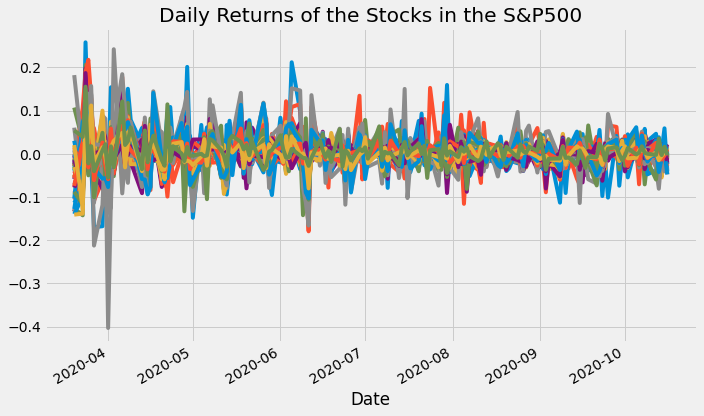

In [ ]:
dftest.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

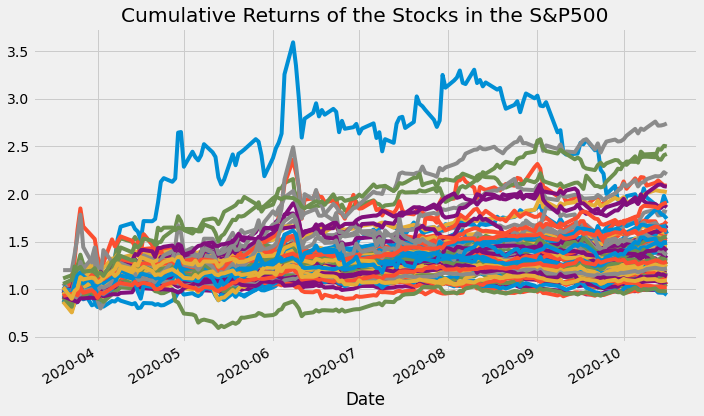

In [ ]:

(dftest.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:

pca = PCA(1).fit(dftest.fillna(0))

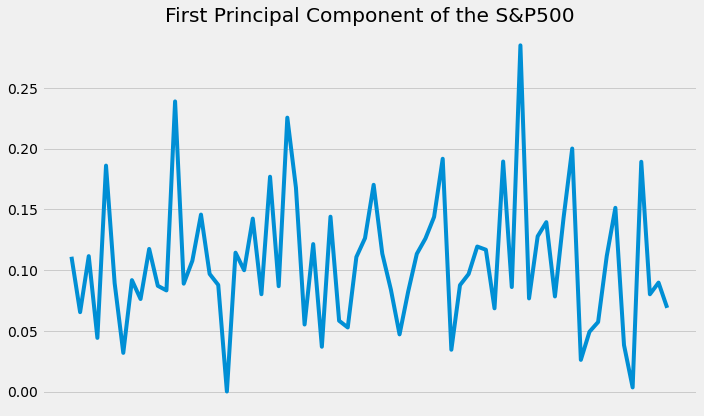

In [ ]:
pc1 = pd.Series(index=dftest.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

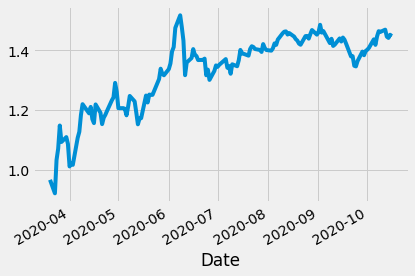

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*dftest).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:
WHPCA = weights.to_frame().T
WHPCA

,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG
0,0.014906,0.008781,0.014972,0.005937,0.024979,0.011982,0.004282,0.012321,0.010234,0.015772,0.011692,0.011182,0.032074,0.011927,0.014461,0.019566,0.013009,0.011789,0.000012,0.015357,0.013413,0.019122,0.010763,0.02375,0.011651,0.03028,0.022534,0.007415,0.016304,0.004959,0.019333,0.007832,0.007089,0.014881,0.01696,0.022856,0.015251,0.011258,0.006321,0.01106,0.015225,0.016923,0.019305,0.025735,0.004626,0.011766,0.012996,0.016033,0.015681,0.009206,0.025432,0.011559,0.038272,0.0103,0.017167,0.018729,0.010519,0.019218,0.026867,0.003508,0.006614,0.007692,0.014978,0.020314,0.005141,0.000464,0.025402,0.010758,0.012046,0.009258


In [ ]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


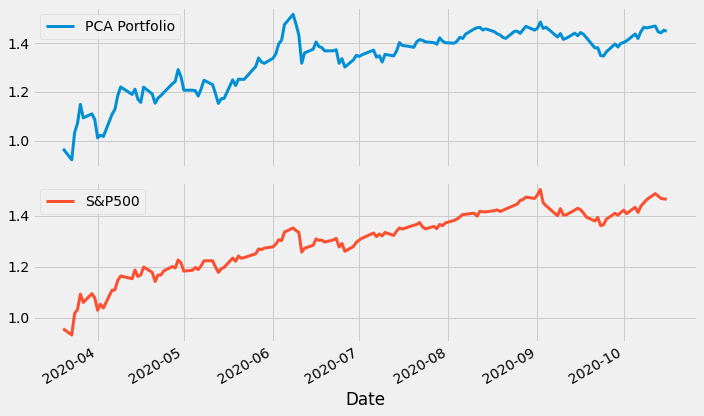

In [ ]:

rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

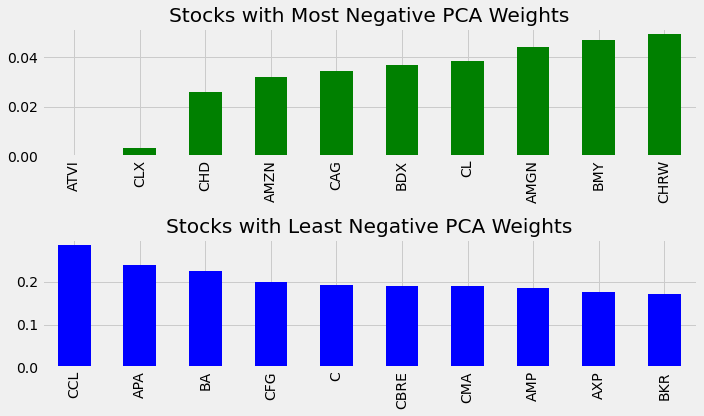

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

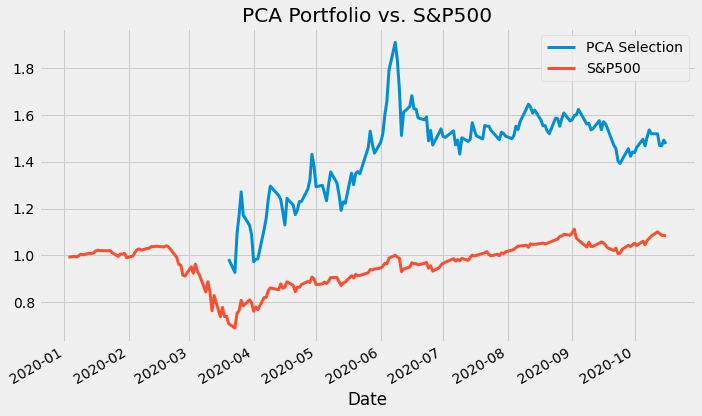

In [ ]:

# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = dftest[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
pip install mlfinlab

     |████████████████████████████████| 952kB 4.5MB/s 
     |████████████████████████████████| 993kB 26.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 8.7MB 5.9MB/s 
     |████████████████████████████████| 10.1MB 50.2MB/s 
     |████████████████████████████████| 430kB 56.4MB/s 
     |████████████████████████████████| 51kB 432kB/s 
     |████████████████████████████████| 1.6MB 43.6MB/s 
     |████████████████████████████████| 3.6MB 18.2MB/s 
     |████████████████████████████████| 516.2MB 34kB/s 
     |████████████████████████████████| 174kB 44.1MB/s 
     |████████████████████████████████| 3.6MB 44.2MB/s 
     |████████████████████████████████| 12.4MB 247kB/s 
     |████████████████████████████████| 6.9MB 7.4MB/s 
     |████████████████████████████████| 112kB 54.7MB/s 
  Installing build dependencies ... done

AxesSubplot(0.08,0.07;0.87x0.81)


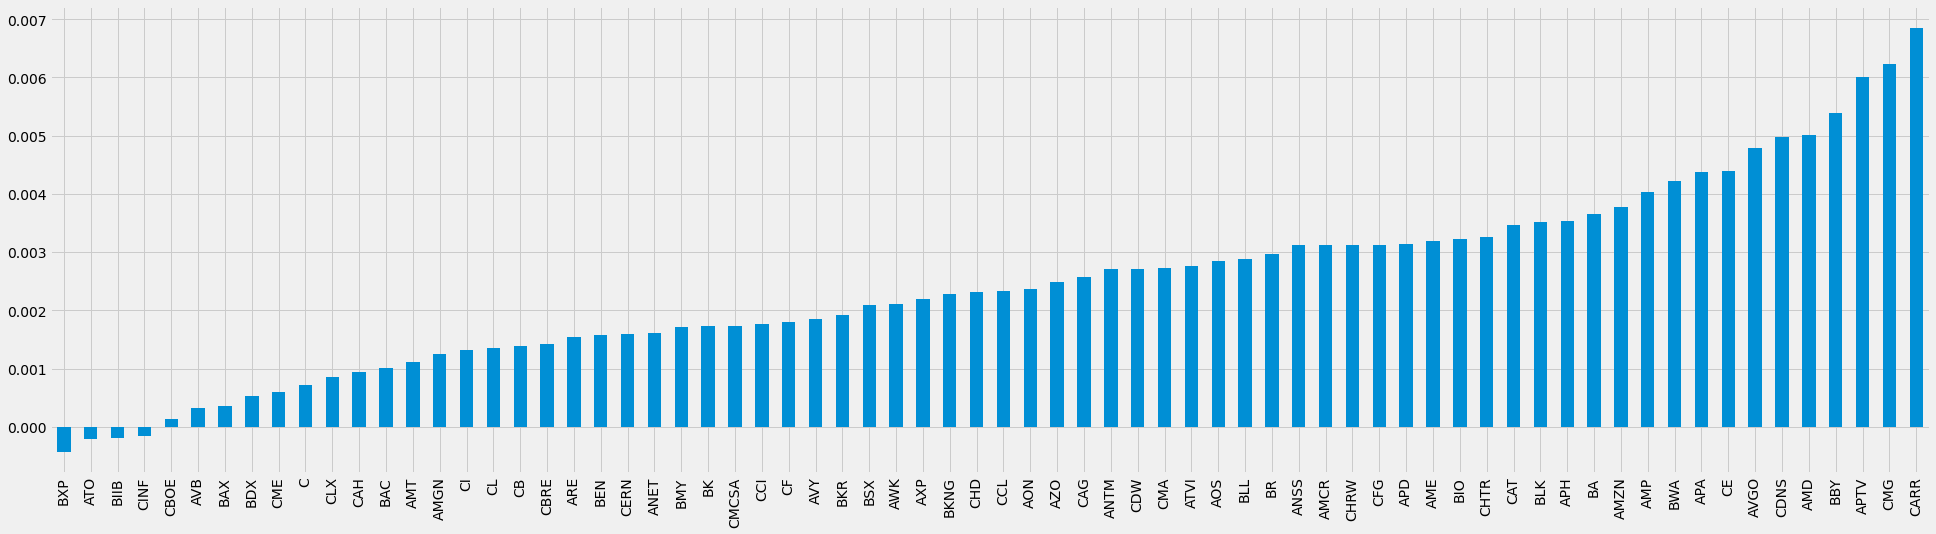

In [ ]:
print((dftest.mean().sort_values().plot.bar(figsize=(30,8))))

In [ ]:
# importing our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mlfinlab.portfolio_optimization import HierarchicalRiskParity

In [ ]:
# constructing our HRP portfolio - Single Linkage
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names=dftest.columns,
             asset_prices=dftest,
             linkage='single')

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:217: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:218: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:259: RuntimeWarning:

invalid value encountered in double_scalars



NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating al

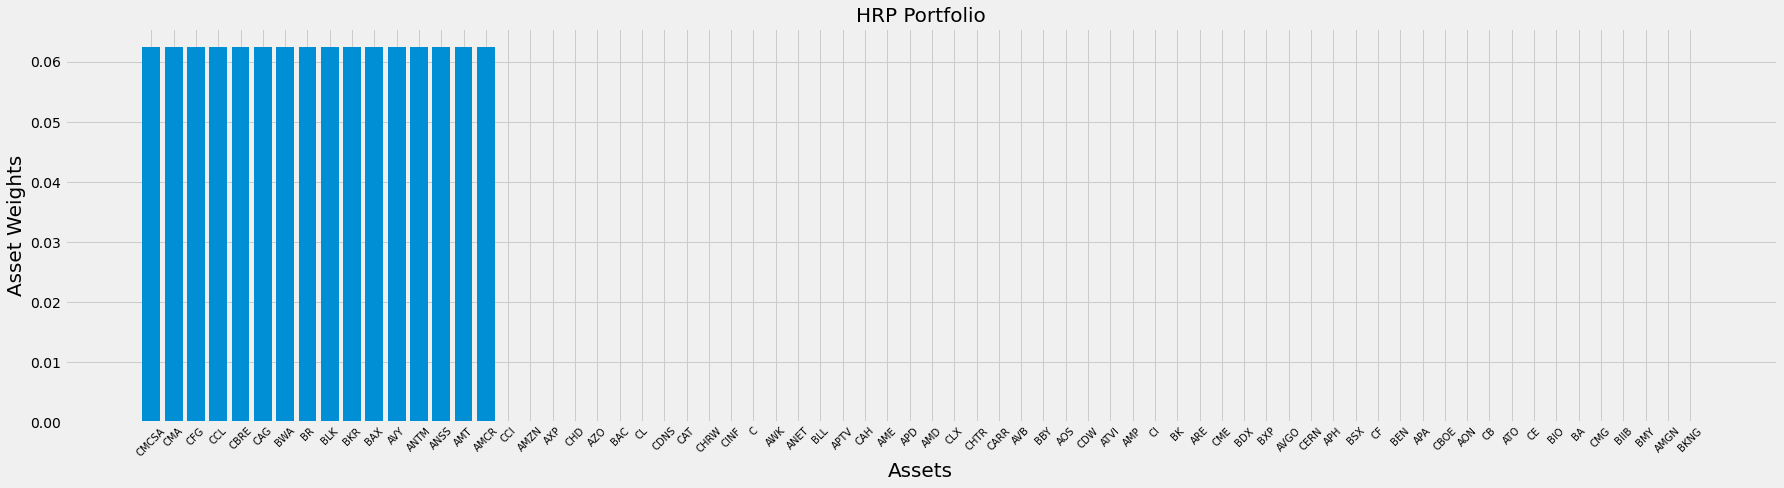

In [ ]:
# plotting our optimal portfolio
hrp_weights = hrp.weights
y_pos = np.arange(len(hrp_weights.columns))
plt.figure(figsize=(25,7))
plt.bar(list(hrp_weights.columns), hrp_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP Portfolio', size=20)
plt.tight_layout()
plt.savefig('HRP Portfolio Weights')
plt.show()

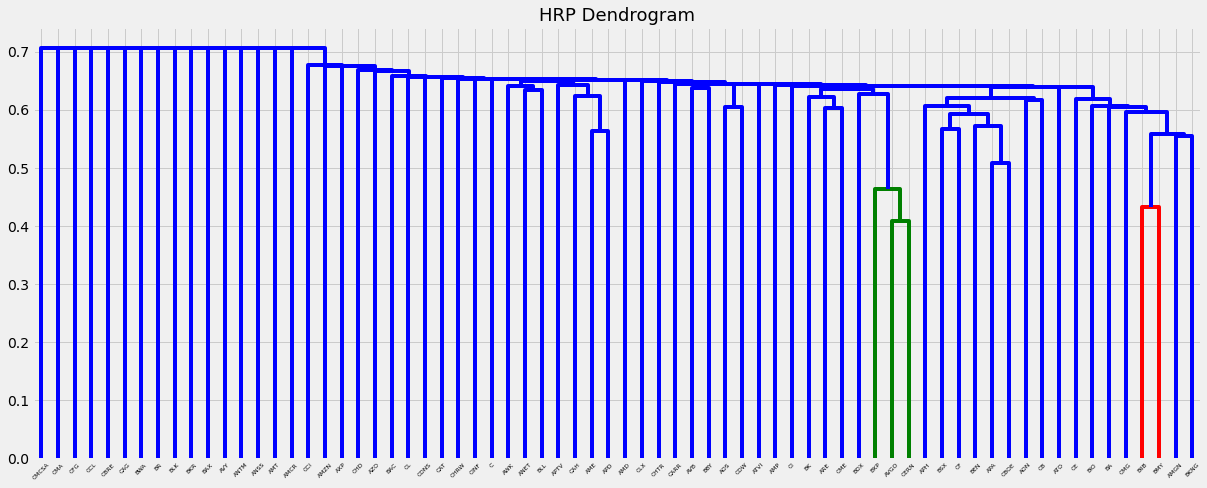

In [ ]:
# plotting dendrogram of HRP portfolio
plt.figure(figsize=(17,7))
hrp.plot_clusters(dftest.columns)
plt.title('HRP Dendrogram', size=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:217: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:218: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.6/dist-packages/mlfinlab/portfolio_optimization/hrp.py:259: RuntimeWarning:

invalid value encountered in double_scalars



NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating allocation factor. Replacing it with equal weighting allocation scheme.
NaNs encountered while calculating al

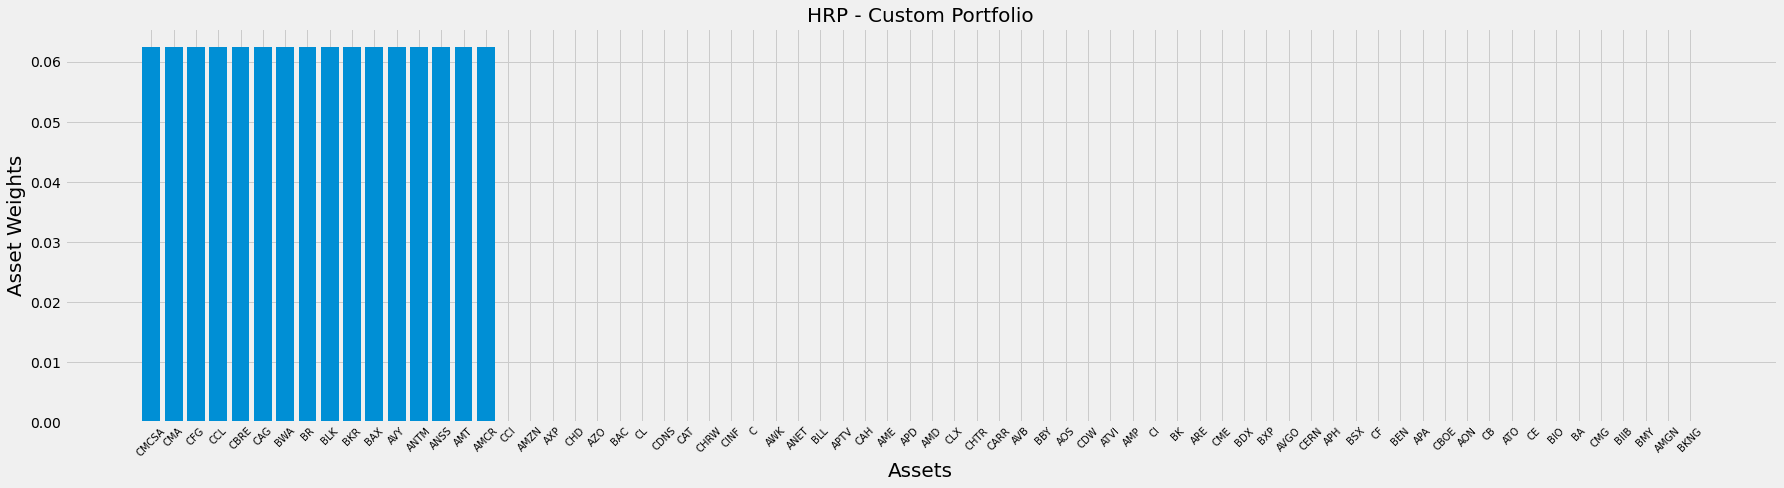

In [ ]:
# importing ReturnsEstimation class from MlFinLab
from mlfinlab.portfolio_optimization.returns_estimators import ReturnsEstimators
# calculating our asset returns
returns = ReturnsEstimators.calculate_returns(dftest)
# calculating our covariance matrix
cov = returns.cov()
# constructing our first custom portfolio
hrp_custom = HierarchicalRiskParity()
hrp_custom.allocate(asset_names=dftest.columns,
                    asset_returns=returns,
                    covariance_matrix=cov)
# plotting our optimal portfolio
hrp_custom_weights = hrp_custom.weights
y_pos = np.arange(len(hrp_custom_weights.columns))
plt.figure(figsize=(25,7))
plt.bar(list(hrp_custom_weights.columns), hrp_custom_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP - Custom Portfolio', size=20)
plt.tight_layout()
plt.show()

In [ ]:
hrp_custom_weights 

,CMCSA,CMA,CFG,CCL,CBRE,CAG,BWA,BR,BLK,BKR,BAX,AVY,ANTM,ANSS,AMT,AMCR,CCI,AMZN,AXP,CHD,AZO,BAC,CL,CDNS,CAT,CHRW,CINF,C,AWK,ANET,BLL,APTV,CAH,AME,APD,AMD,CLX,CHTR,CARR,AVB,BBY,AOS,CDW,ATVI,AMP,CI,BK,ARE,CME,BDX,BXP,AVGO,CERN,APH,BSX,CF,BEN,APA,CBOE,AON,CB,ATO,CE,BIO,BA,CMG,BIIB,BMY,AMGN,BKNG
0,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


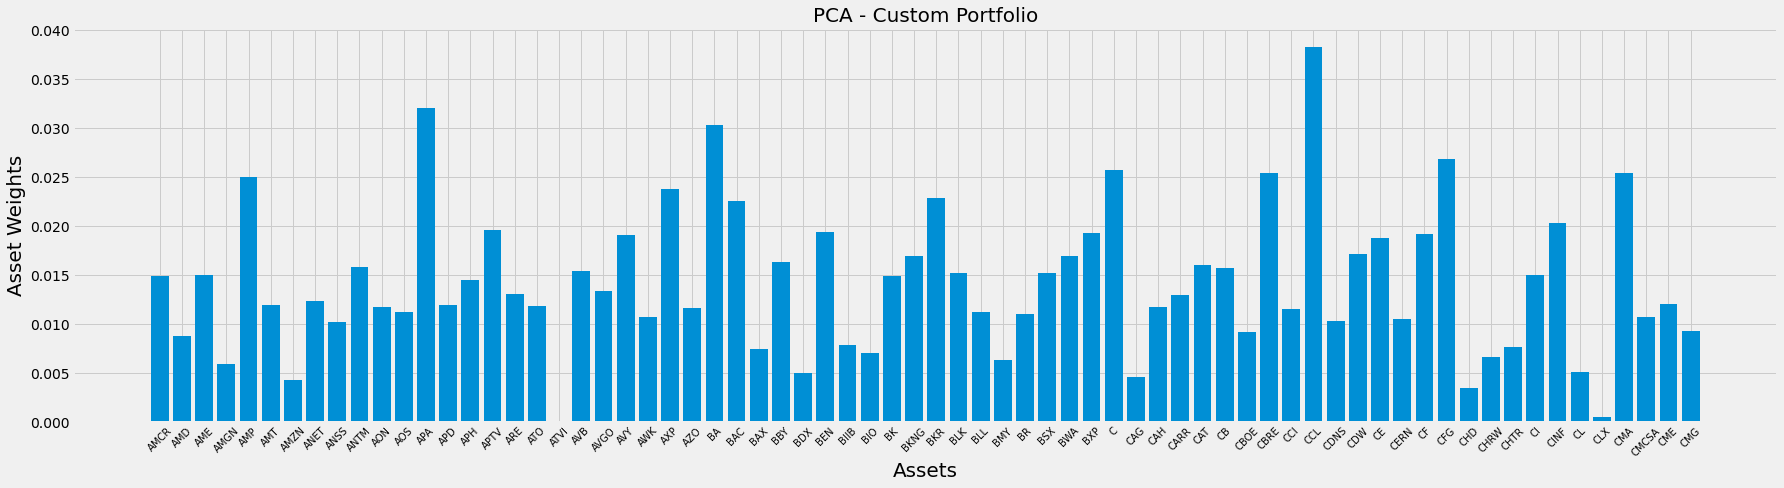

In [ ]:
# plotting our PCA optimal portfolio 

y_pos = np.arange(len(WHPCA.columns))
plt.figure(figsize=(25,7))
plt.bar(list(WHPCA.columns), WHPCA.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('PCA - Custom Portfolio', size=20)
plt.tight_layout()
plt.show()